# 📊 Análisis Exploratorio de Ventas – Superstore Dataset

Este proyecto analiza las ventas y ganancias de una empresa minorista,
con el objetivo de identificar patrones de rentabilidad, tendencias
temporales y oportunidades de mejora.


## 1. Carga y Exploración Inicial de Datos
Cargamos el dataset superstore y vemos su estructura básica. Esto nos ayuda a entender qué columnas tenemos (ej. Sales, Profit).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Sample_Superstore.csv", encoding="latin1")
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# 🔍 Exploración inicial de los datos


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [3]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [4]:
df.shape

(9994, 21)

In [5]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


# 🧹 Limpieza y preparación de datos


In [6]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])


In [7]:
df[['Order Date', 'Ship Date']].head()


,Order Date,Ship Date
0,2016-11-08,2016-11-11
1,2016-11-08,2016-11-11
2,2016-06-12,2016-06-16
3,2015-10-11,2015-10-18
4,2015-10-11,2015-10-18


In [8]:
df['order_year'] = df['Order Date'].dt.year


# 📌 Métricas generales


In [9]:
df['Sales'].sum()


np.float64(2297200.8603000003)

In [10]:
df['Profit'].sum()


np.float64(286397.0217)

## 📊 Análisis agregado


In [11]:
df.groupby('order_year')[['Sales', 'Profit']].sum()


,Sales,Profit
order_year,,
2014,484247.4981,49543.9741
2015,470532.5090,61618.6037
2016,609205.5980,81795.1743
2017,733215.2552,93439.2696


In [13]:
df.groupby('Category')[['Sales', 'Profit']].sum().sort_values(by='Profit', ascending=False)


,Sales,Profit
Category,,
Technology,836154.0330,145454.9481
Office Supplies,719047.0320,122490.8008
Furniture,741999.7953,18451.2728


In [12]:
df.groupby('Segment')[['Sales', 'Profit']].sum()


,Sales,Profit
Segment,,
Consumer,1.161401e+06,134119.2092
Corporate,7.061464e+05,91979.1340
Home Office,4.296531e+05,60298.6785


In [14]:
df.groupby('Region')[['Sales', 'Profit']].sum()


,Sales,Profit
Region,,
Central,501239.8908,39706.3625
East,678781.2400,91522.7800
South,391721.9050,46749.4303
West,725457.8245,108418.4489


In [15]:
df.groupby('Sub-Category')[['Sales', 'Profit']].sum().sort_values('Profit', ascending=False)


,Sales,Profit
Sub-Category,,
Copiers,149528.0300,55617.8249
Phones,330007.0540,44515.7306
Accessories,167380.3180,41936.6357
Paper,78479.2060,34053.5693
Binders,203412.7330,30221.7633
Chairs,328449.1030,26590.1663
Storage,223843.6080,21278.8264
Appliances,107532.1610,18138.0054
Furnishings,91705.1640,13059.1436


## 📈 Margen de ganancia


In [16]:
df['profit_margin'] = df['Profit'] / df['Sales']


In [17]:
df.groupby('Category')['profit_margin'].mean()


,profit_margin
Category,
Furniture,0.038784
Office Supplies,0.138030
Technology,0.156138


In [18]:
df.groupby('Discount')[['Sales', 'Profit']].mean().sort_index()


,Sales,Profit
Discount,,
0.00,226.742074,66.900292
0.10,578.397351,96.055074
0.15,529.971567,27.288298
0.20,209.076940,24.702572
0.30,454.742974,-45.679636
0.32,536.794770,-88.560656
0.40,565.134874,-111.927429
0.45,498.634000,-226.646464
0.50,892.705152,-310.703456


## 📉 Visualizaciones


# 📈 Evolución de Ventas y Ganancias en el Tiempo


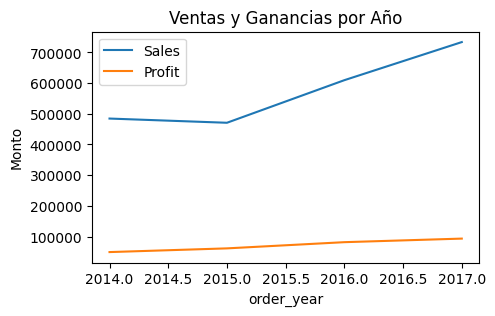

In [33]:
import matplotlib.pyplot as plt

df.groupby('order_year')[['Sales', 'Profit']].sum().plot(figsize=(5,3))

plt.title("Ventas y Ganancias por Año")
plt.ylabel("Monto")


plt.savefig("ventas_ganancias_por_ano.png", dpi=300, bbox_inches="tight")

plt.show()





Las ventas y ganancias muestran una tendencia creciente a lo largo de los años, indicando una mejora sostenida del negocio.

# 📊 Análisis por Categoría


En este gráfico se analiza la ganancia total obtenida por cada categoría de productos, con el objetivo de identificar cuáles son las más rentables.

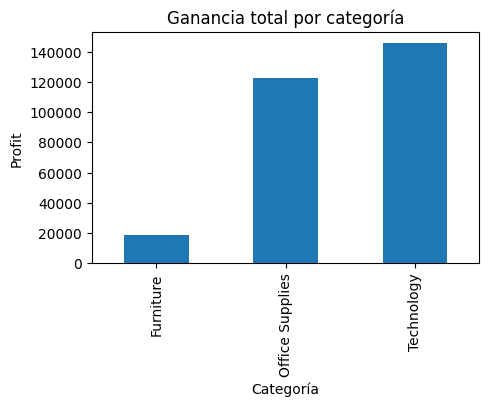

In [30]:
plt.figure(figsize=(5,3))
df.groupby('Category')['Profit'].sum().plot(kind='bar')
plt.title('Ganancia total por categoría')
plt.xlabel('Categoría')
plt.ylabel('Profit')

plt.savefig('profit_por_categoria.png', dpi=300, bbox_inches='tight')
plt.show()


Technology concentra la mayor cantidad de ventas y ganancias, mientras que Furniture presenta menor rentabilidad relativa.

 # 🎯 Impacto del Descuento en la Rentabilidad

 Analizamos cómo impacta el descuento en la rentabilidad promedio


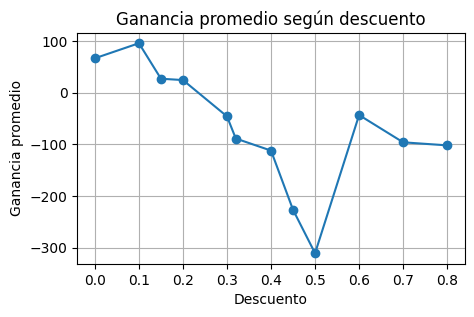

In [31]:
ax = df.groupby('Discount')['Profit'].mean().plot(
    figsize=(5,3),
    marker='o'
)

ax.set_title("Ganancia promedio según descuento")
ax.set_xlabel("Descuento")
ax.set_ylabel("Ganancia promedio")
ax.grid(True)
fig = ax.get_figure()
fig.savefig("profit_promedio_por_descuento.png", dpi=300, bbox_inches='tight')



Conclusión:                                                                                                   
 Los productos sin descuento presentan la mayor ganancia promedio.                       
 A medida que el descuento aumenta, la rentabilidad tiende a disminuir, aunque no de forma estrictamente lineal.


# 📦 Análisis de Distribución y Outliers



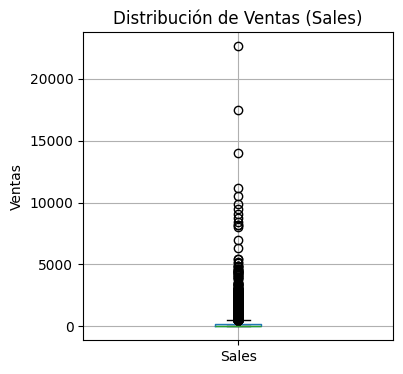

In [34]:
ax = df.boxplot(column='Sales', figsize=(4,4))

ax.set_title("Distribución de Ventas (Sales)")
ax.set_ylabel("Ventas")
fig = ax.get_figure()
fig.savefig("boxplot_sales.png", dpi=300, bbox_inches='tight')



La distribución de las ventas presenta valores extremos, correspondientes a operaciones de alto volumen poco frecuentes.

 Distribución de Ganancias (Profit)                        
 Análisis de la dispersión y valores atípicos en la rentabilidad


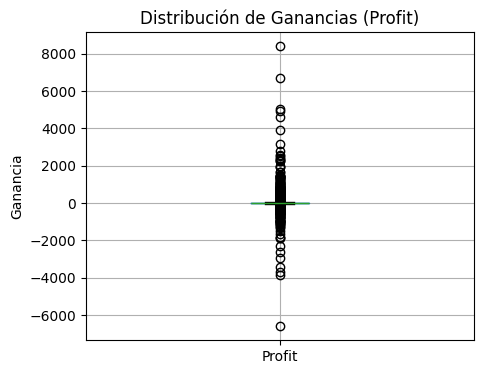

In [35]:
ax = df.boxplot(column='Profit', figsize=(5,4))

ax.set_title("Distribución de Ganancias (Profit)")
ax.set_ylabel("Ganancia")
fig = ax.get_figure()
fig.savefig("boxplot_profit.png", dpi=300, bbox_inches='tight')



 Conclusión:            
 Se observa una alta dispersión en las ganancias y la presencia de valores atípicos,lo que indica operaciones con comportamientos extremos de rentabilidad,tanto positivos como negativos.


In [1]:
from sklearn.linear_model import LinearRegression


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [6]:
df = pd.read_csv("Sample_Superstore.csv", encoding="latin1")


In [7]:
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [8]:
X = df[['Sales']]
y = df['Profit']


In [10]:
X.head()



,Sales
0,261.9600
1,731.9400
2,14.6200
3,957.5775
4,22.3680


In [11]:
X.head()
y.head()


,Profit
0,41.9136
1,219.5820
2,6.8714
3,-383.0310
4,2.5164


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [13]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)


LinearRegression()

In [14]:
prediccion = modelo.predict([[500]])
prediccion


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([101.39450107])

In [15]:
print(f"Beneficio estimado para ventas de $500: {prediccion[0]:.2f}")


Beneficio estimado para ventas de $500: 101.39


Conclusión
En este análisis se aplicó un modelo de Regresión Lineal para predecir el beneficio a partir del monto de ventas.
El modelo permite estimar el beneficio esperado según las ventas realizadas, demostrando una aplicación básica de Machine Learning sobre datos reales del dataset Superstore.